In [1]:
import gradio as gr 
from sklearn.neural_network import MLPClassifier 
# Install torchvision if not already installed
import torchvision.datasets as datasets 
import seaborn as sns 

#dark mode seaborn 
sns.set_style("darkgrid")

c:\Users\79639\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

100%|██████████| 9.91M/9.91M [00:12<00:00, 816kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 438kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 532kB/s]


In [3]:
print(mnist_trainset.data.shape)
print(mnist_testset.data.shape)
print(mnist_trainset.targets.shape)
print(mnist_testset.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])


In [4]:
X_train = mnist_trainset.data
y_train = mnist_trainset.targets
X_test = mnist_testset.data
y_test = mnist_testset.targets

In [5]:
X_train = X_train.numpy() 
X_test = X_test.numpy()
y_train = y_train.numpy()
y_test = y_test.numpy()

<Axes: ylabel='Count'>

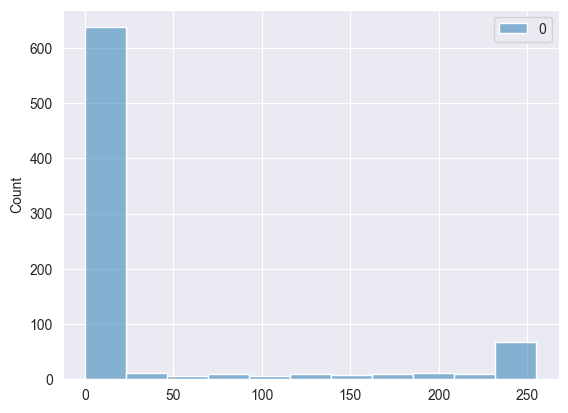

In [6]:
sns.histplot(data = X_train[0].reshape(784,1))

<Axes: >

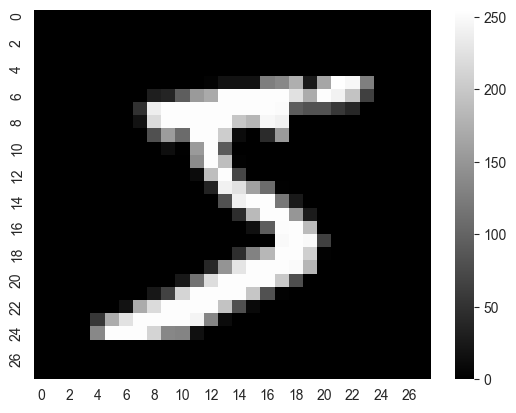

In [7]:
#plot the first image 
sns.heatmap(X_train[0], cmap = "gray")

In [8]:
X_train = X_train.reshape(60000, 784)/255.0
X_test = X_test.reshape(10000, 784)/255.0

In [9]:
#train the model 
mlp = MLPClassifier(hidden_layer_sizes=(32,32))
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(32, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [10]:
#print the accuracies 
print("Training Accuracy: ", mlp.score(X_train, y_train))
print("Testing Accuracy: ", mlp.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9685


In [11]:
def predict(img):
    img = img.reshape(1,784)/255.0
    prediction = mlp.predict(img)[0]
    return int(prediction)

In [12]:
gr.Interface(fn= predict, inputs = "sketchpad", outputs ="label").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
